# Import and warehouse data:

• Import all the given datasets. Explore shape and size.

• Merge all datasets onto one and explore final shape and size.

In [1]:
# importing all required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading both the datasets 
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

print(f'The dataset df1 has a shape of {df1.shape} and a size of {df1.size}')
print(f'The dataset df2 has a shape of {df2.shape} and a size of {df2.size}')

The dataset df1 has a shape of (7043, 10) and a size of 70430
The dataset df2 has a shape of (7043, 11) and a size of 77473


In [3]:
# looking at the columns to determine how to combine both the datasets
print(df1.columns)
print(df2.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')
Index(['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [4]:
# both datasets seems to be of the same customers with no common column.
# Therefore we will concatenate the columns
df = pd.concat([df1,df2], axis = 1)
print(f'The dataset df has a shape of {df.shape} and a size of {df.size}')

The dataset df has a shape of (7043, 21) and a size of 147903


In [5]:
# looking at the top 5 rows
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Data cleansing: 

• Missing value treatment

• Convert categorical attributes to continuous using relevant functional knowledge

• Drop attribute/s if required using relevant functional knowledge

• Automate all the above steps

In [6]:
# replacing all the commonly known dummy fillers with nan values
df.replace(to_replace=[' ','-','NA','na',],value=np.NaN, inplace=True)

In [7]:
# calculating the total null values in each column
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# only TotalCharges column has 11 null values. Since it is a small number, we can drop the rows

original_size=df.size

df.dropna(axis=0, inplace=True)

final_size=df.size

print(f'Total data lost after dropping = {(original_size-final_size)*100/original_size} %')

Total data lost after dropping = 0.15618344455487718 %


In [9]:
# the column 'customerID' has no significance in the churn outcome and hence can be dropped
df.drop('customerID', inplace=True, axis=1)

In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
# lets check the actual values in each column to determine if the columns are categorical or not
for column in df.columns:
    print(column,df[column].unique())
    print('-'*55)

gender ['Female' 'Male']
-------------------------------------------------------
SeniorCitizen [0 1]
-------------------------------------------------------
Partner ['Yes' 'No']
-------------------------------------------------------
Dependents ['No' 'Yes']
-------------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
-------------------------------------------------------
PhoneService ['No' 'Yes']
-------------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
-------------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
-------------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
-------------------------------------------------------
OnlineBackup [

In [12]:
# Lets create a dictionary to replace categorical values to continous values
replaceStruct = {
                "gender": {"Female": 0, "Male": 1 },
                "Partner": {"Yes": 1, "No":0 },
                "Dependents": {"Yes": 1, "No":0 },
                "PhoneService": {"Yes": 1, "No":0 },
                "MultipleLines":{"No phone service": -1, "Yes": 1, "No":0 },
                "InternetService" :{'DSL':1 ,'Fiber optic':2, 'No':0},
                "OnlineSecurity" :{'No' :0 ,'Yes':1 ,'No internet service':-1},
                "OnlineBackup" :{'No' :0 ,'Yes':1 ,'No internet service':-1},
                "DeviceProtection" :{'No' :0 ,'Yes':1 ,'No internet service':-1},
                "TechSupport" :{'No' :0 ,'Yes':1 ,'No internet service':-1},
                "StreamingTV" :{'No' :0 ,'Yes':1 ,'No internet service':-1},
                "StreamingMovies" :{'No' :0 ,'Yes':1 ,'No internet service':-1},
                "Contract": {'Month-to-month' :0 ,'One year':1 ,'Two year':2},
                "PaperlessBilling" : {'Yes' : 1, 'No' : 0},
                "PaymentMethod" : {'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)': 3},
                "Churn": {'No':0, 'Yes':1},
                    }
df=df.replace(replaceStruct)

# Total Charges column needs to be converted to float type 
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [13]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [14]:
# Automate all the above steps

# The below function has to be provided with dataset, a dictionary with categorical columns 
# and its numerical counterpart, and a list of columns to drop

def dataclean(dataset, cat_to_cont, dropcols):
    
    # replacing all dummy fillers with nan values
    dataset.replace(to_replace=[' ','-','NA','na',],value=np.NaN, inplace=True)
    
    #dropping null values
    dataset.dropna(axis=0, inplace=True)
    
    #Dropping columns which arent required
    dataset.drop(dropcols, inplace=True, axis=1)
    
    # replacing all specified columns with continous values
    dataset=dataset.replace(cat_to_cont)
    
    return dataset

In [15]:
# implementing above function

#dataset
dfnew=pd.concat([df1,df2], axis = 1)

#cat_to_cont
replaceStruct = {
                "gender": {"Female": 0, "Male": 1 },
                "Partner": {"Yes": 1, "No":0 },
                "Dependents": {"Yes": 1, "No":0 },
                "PhoneService": {"Yes": 1, "No":0 },
                "MultipleLines":{"No phone service": -1, "Yes": 1, "No":0 },
                "InternetService" :{'DSL':1 ,'Fiber optic':2, 'No':0},
                "OnlineSecurity" :{'No' :0 ,'Yes':1 ,'No internet service':-1},
                "OnlineBackup" :{'No' :0 ,'Yes':1 ,'No internet service':-1},
                "DeviceProtection" :{'No' :0 ,'Yes':1 ,'No internet service':-1},
                "TechSupport" :{'No' :0 ,'Yes':1 ,'No internet service':-1},
                "StreamingTV" :{'No' :0 ,'Yes':1 ,'No internet service':-1},
                "StreamingMovies" :{'No' :0 ,'Yes':1 ,'No internet service':-1},
                "Contract": {'Month-to-month' :0 ,'One year':1 ,'Two year':2},
                "PaperlessBilling" : {'Yes' : 1, 'No' : 0},
                "PaymentMethod" : {'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)': 3},
                "Churn": {'No':0, 'Yes':1},
                    }

#dropcols
dropcol='customerID'

dfnew = dataclean(dfnew,replaceStruct,dropcol)

print(f'df1 shape is {dfnew.shape} \nand null values are \n{dfnew.isna().sum()}')


df1 shape is (7032, 20) 
and null values are 
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Data analysis & visualisation:

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [16]:
# specifying categorical columns
cat_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'Churn']

#specifying numerical/continous columns
cont_cols=['tenure','MonthlyCharges', 'TotalCharges']

for column in cont_cols:
    print(f'{column} has mean {round(df[column].mean(),2)}, median {round(df[column].median(),2)}, range of {round(df[column].min(),2)} to {round(df[column].max(),2)} and a standard deviation of {round(df[column].std(),2)}')
    print()

tenure has mean 32.42, median 29.0, range of 1 to 72 and a standard deviation of 24.55

MonthlyCharges has mean 64.8, median 70.35, range of 18.25 to 118.75 and a standard deviation of 30.09

TotalCharges has mean 2283.3, median 1397.47, range of 18.8 to 8684.8 and a standard deviation of 2266.77



- median tenure of customers is 29 years as compared to a max of 72 years. This might imply that either many older customers are leaving or the company has acquired a lot of new customers
- Average monthly charges are 64.4 and average Total charges are 2283.3

In [17]:
print('percentage distribution of each categorical column') 
for col in cat_cols:
    print(col)
    print(df[col].value_counts()*100/7043)
    print()

percentage distribution of each categorical column
gender
1    50.390459
0    49.453358
Name: gender, dtype: float64

SeniorCitizen
0    83.629135
1    16.214681
Name: SeniorCitizen, dtype: float64

Partner
0    51.668323
1    48.175493
Name: Partner, dtype: float64

Dependents
0    70.041176
1    29.802641
Name: Dependents, dtype: float64

PhoneService
1    90.188840
0     9.654977
Name: PhoneService, dtype: float64

MultipleLines
 0    48.061905
 1    42.126935
-1     9.654977
Name: MultipleLines, dtype: float64

InternetService
2    43.958540
1    34.303564
0    21.581712
Name: InternetService, dtype: float64

OnlineSecurity
 0    49.652137
 1    28.609967
-1    21.581712
Name: OnlineSecurity, dtype: float64

OnlineBackup
 0    43.830754
 1    34.431350
-1    21.581712
Name: OnlineBackup, dtype: float64

DeviceProtection
 0    43.930143
 1    34.331961
-1    21.581712
Name: DeviceProtection, dtype: float64

TechSupport
 0    49.297174
 1    28.964930
-1    21.581712
Name: TechSuppor

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.325228,0.642585,-1.00,0.0000,0.000,1.0000,1.00
InternetService,7032.0,1.224118,0.778643,0.00,1.0000,1.000,2.0000,2.00
OnlineSecurity,7032.0,0.070392,0.705562,-1.00,0.0000,0.000,1.0000,1.00
OnlineBackup,7032.0,0.128697,0.737917,-1.00,0.0000,0.000,1.0000,1.00


Histogram of all numerical columns


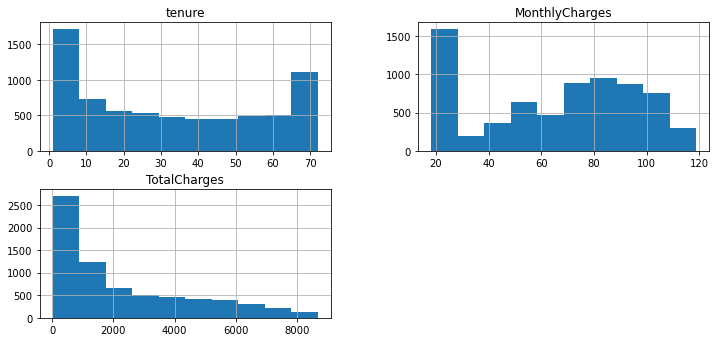

In [19]:
print('Histogram of all numerical columns')
df[cont_cols].hist(stacked=False, figsize=(12,30), layout=(10,2)); 

- There are high number of very new and very old customers
- The company has a high number of low paying customers
- The total charges data is right skewed with very high number of low paying customers

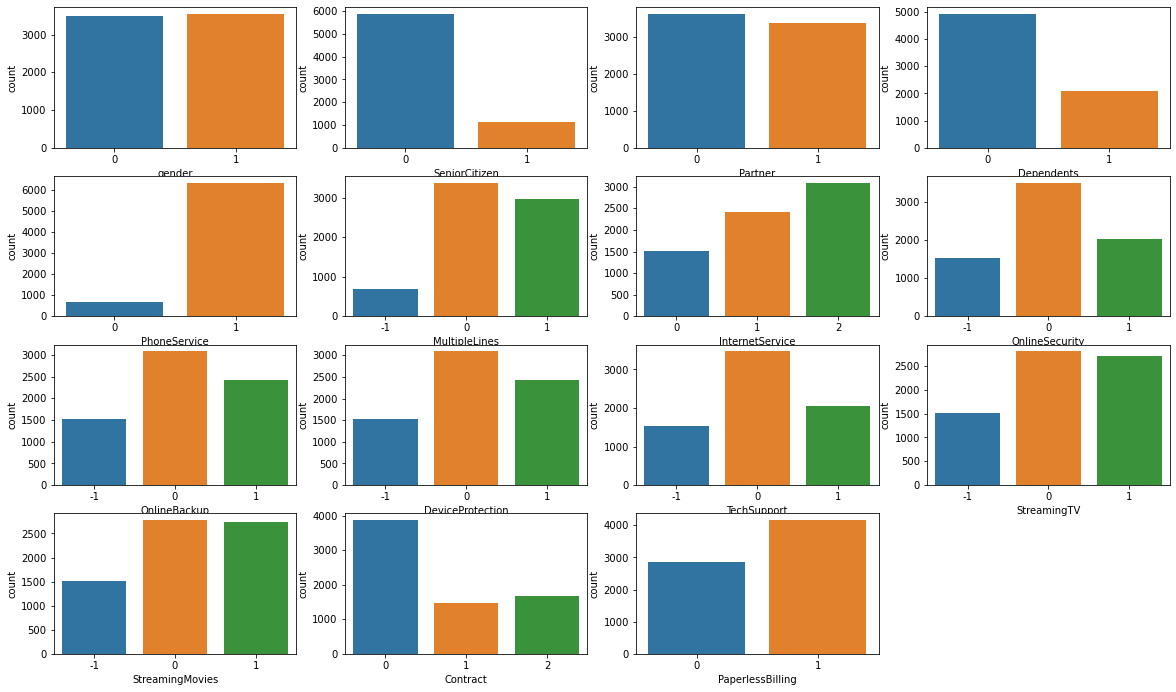

In [20]:
counter=1
plot=plt.figure(figsize=(20,15))

for cols in cat_cols[:-2]:
    plot=plt.subplot(5,4,counter)
    sns.countplot(data=df,  x = df[cols])
    counter+=1

- very few customers are senior citizens
- number of customers who are partners and are not partners are almost equal
- number of females and males are almost equal
- majority of customers have the phone service
- majority of customers dont have dependants
- majority of customers have not opted for multiple lines, online security, online backup device protection and tech support
- majority of customers are using paperless billing

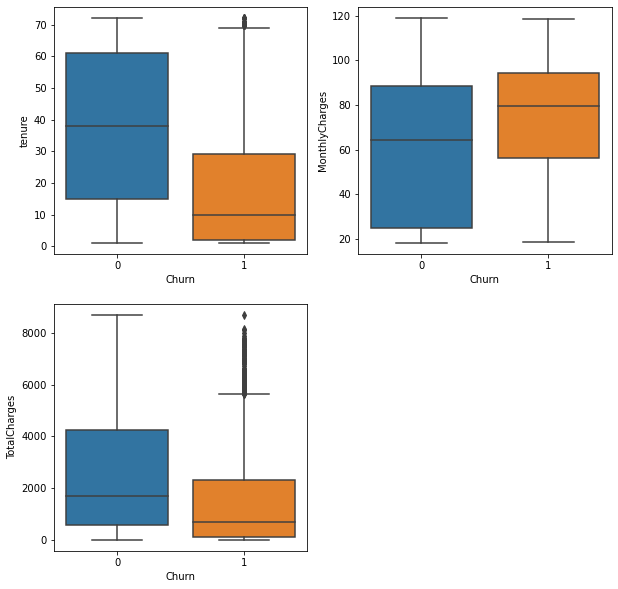

In [21]:
counter=1
plot=plt.figure(figsize=(10,10))

for cols in cont_cols:
    plot=plt.subplot(2,2,counter)
    sns.boxplot(data=df, y=cols, x= 'Churn')
    counter+=1

- churners have a low median tenure, high median monthly charges and low median total charges

In [22]:
df.corr() # It will show correlation matrix 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.010284,-0.009643,-0.013233,-0.011081,-0.003168,-0.008215,-0.007163,-0.009072,0.000095,-0.011902,-0.004928,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.113769,0.259030,0.081766,0.144762,0.140226,0.067318,0.167123,0.176125,-0.141820,0.156258,-0.093712,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.118037,0.000938,0.092034,0.091536,0.099077,0.077252,0.080205,0.076076,0.294094,-0.013957,0.133280,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.019178,-0.177789,-0.028964,-0.061970,-0.068296,-0.040057,-0.085909,-0.099795,0.240556,-0.110131,0.124002,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.259112,0.031272,0.232295,0.253575,0.253834,0.230429,0.200646,0.203834,0.676734,0.004823,0.340939,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.674824,0.094182,-0.158997,-0.129432,-0.141055,-0.160950,-0.107242,-0.114798,0.003019,0.016696,-0.003106,0.248033,0.113008,0.011691
MultipleLines,-0.010284,0.113769,0.118037,-0.019178,0.259112,0.674824,1.000000,0.308546,0.069959,0.130978,0.125447,0.069706,0.166256,0.163218,0.084037,0.133538,0.026248,0.491412,0.412495,0.036148
InternetService,-0.009643,0.259030,0.000938,-0.177789,0.031272,0.094182,0.308546,1.000000,0.581993,0.658487,0.662791,0.585745,0.725522,0.722592,-0.288855,0.377644,-0.178655,0.905389,0.428212,0.316350
OnlineSecurity,-0.013233,0.081766,0.092034,-0.028964,0.232295,-0.158997,0.069959,0.581993,1.000000,0.704598,0.701112,0.734696,0.661541,0.666682,0.016495,0.184449,0.035563,0.635260,0.483157,0.023014
OnlineBackup,-0.011081,0.144762,0.091536,-0.061970,0.253575,-0.129432,0.130978,0.658487,0.704598,1.000000,0.710790,0.708659,0.702605,0.699828,-0.034745,0.260691,-0.003786,0.710175,0.537726,0.073934


<AxesSubplot:>

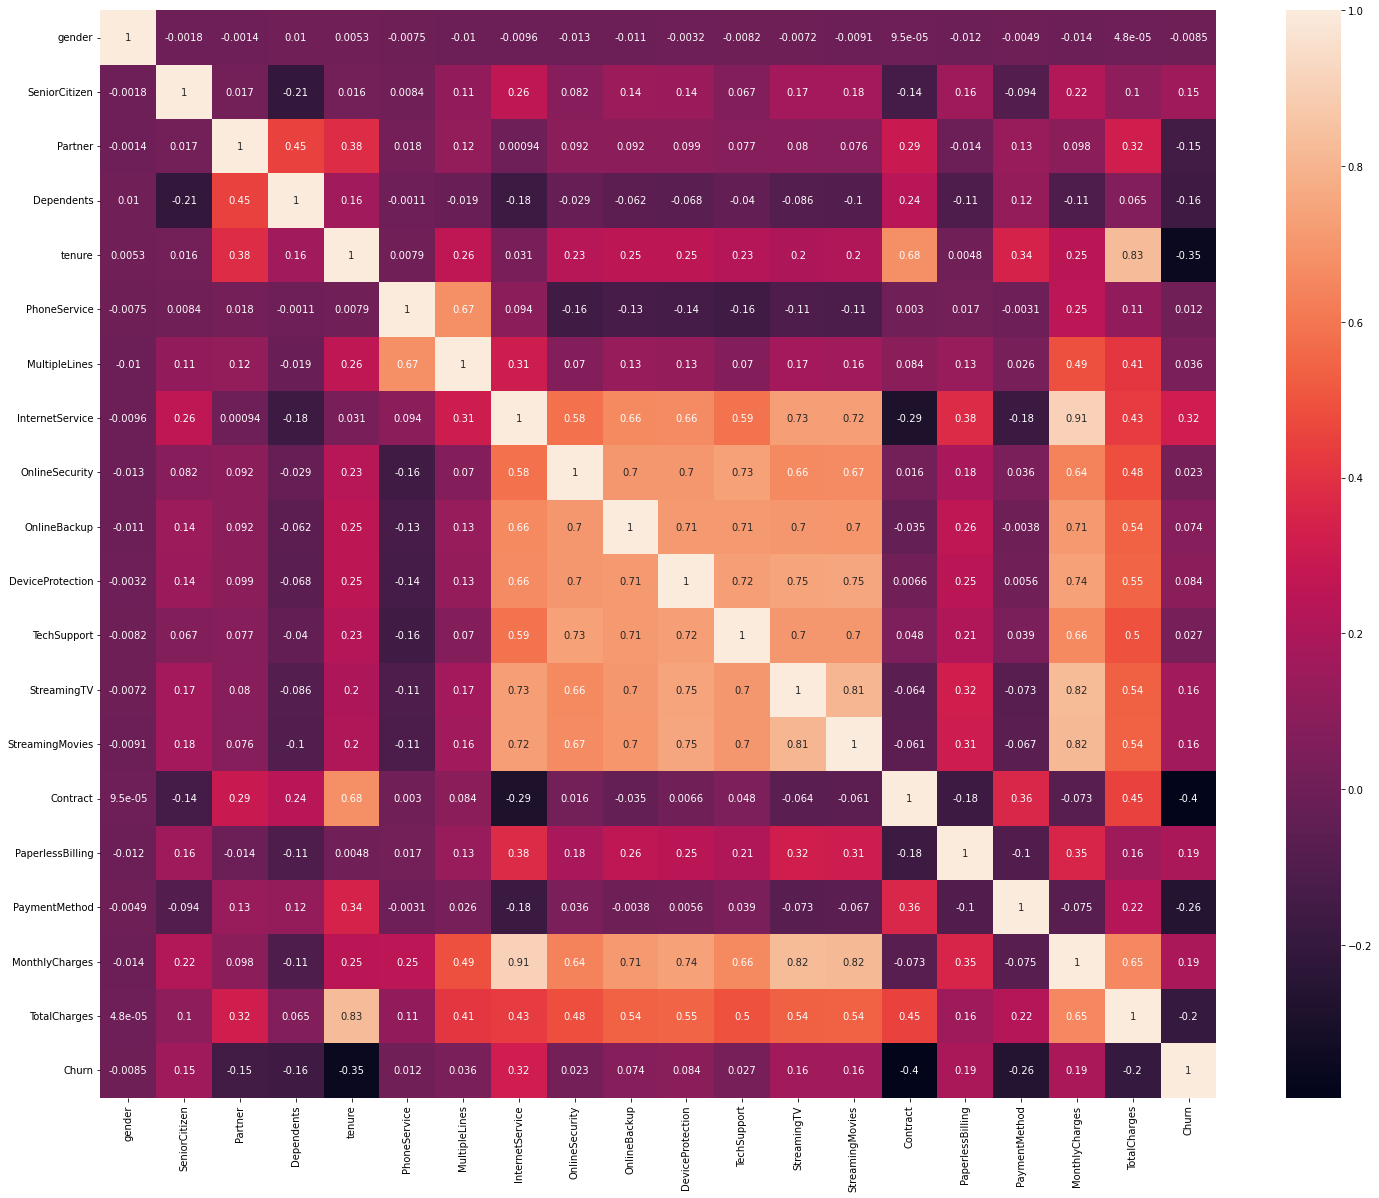

In [23]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True,)

- phone service and multiple lines has a high correlation
- internet service, online security, online backup, device protection, tech support, streaming tv, streaming movies and monthly charges have a high correlation with each other as seen from the above heat map

# Data pre-processing:

• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

• Check if the train and test data have similar statistical characteristics when compared with original data.

In [24]:
# Segregating predictor and targets into x and y
x=df.drop('Churn', axis=1)
y=df['Churn']

In [25]:
#checking for target imbalance
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [26]:
# there is a target imbalance

# balancing the targets
x1=df.loc[df['Churn']==0][:1869]
x2=df.loc[df['Churn']==1]
df_balanced=pd.concat([x1,x2], axis=0)

# Segregating predictor and targets into x and y
x=df_balanced.drop('Churn', axis=1)
y=df_balanced['Churn']

#verifying target balance
y.value_counts()


0    1869
1    1869
Name: Churn, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

# performing train test split in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [28]:
#Checking if the train and test data have similar statistical characteristics 
#when compared with original data

for column in x_train.columns:
    print(f'column: {column}')  
    print(f'mean\t original data: {round(df[column].mean(),2)},\t training data: {round(x_train[column].mean(),2)},\t testing data: {round(x_test[column].mean(),2)}') 
    print(f'median\t original data: {round(df[column].median(),2)},\t training data: {round(x_train[column].median(),2)},\t testing data: {round(x_test[column].median(),2)}')    
    print(f'std dev\t original data: {round(df[column].std(),2)},\t training data: {round(x_train[column].std(),2)},\t testing data: {round(x_test[column].std(),2)}')      
    print(f'min\t original data: {round(df[column].min(),2)},\t training data: {round(x_train[column].min(),2)},\t testing data: {round(x_test[column].min(),2)}') 
    print(f'max\t original data: {round(df[column].max(),2)},\t training data: {round(x_train[column].max(),2)},\t testing data: {round(x_test[column].max(),2)}')
    print()



column: gender
mean	 original data: 0.5,	 training data: 0.51,	 testing data: 0.51
median	 original data: 1.0,	 training data: 1.0,	 testing data: 1.0
std dev	 original data: 0.5,	 training data: 0.5,	 testing data: 0.5
min	 original data: 0,	 training data: 0,	 testing data: 0
max	 original data: 1,	 training data: 1,	 testing data: 1

column: SeniorCitizen
mean	 original data: 0.16,	 training data: 0.2,	 testing data: 0.18
median	 original data: 0.0,	 training data: 0.0,	 testing data: 0.0
std dev	 original data: 0.37,	 training data: 0.4,	 testing data: 0.38
min	 original data: 0,	 training data: 0,	 testing data: 0
max	 original data: 1,	 training data: 1,	 testing data: 1

column: Partner
mean	 original data: 0.48,	 training data: 0.45,	 testing data: 0.43
median	 original data: 0.0,	 training data: 0.0,	 testing data: 0.0
std dev	 original data: 0.5,	 training data: 0.5,	 testing data: 0.5
min	 original data: 0,	 training data: 0,	 testing data: 0
max	 original data: 1,	 training

In [60]:
# conclusion: there is not a substantial difference between the statistics of original vs training vs testing data
# therefore train and test data have similar statistical characteristics when compared with original data 
# as observed for both categorical as well as numerical data.

# Model training, testing and tuning

• Train and test all ensemble models taught in the learning module.

• Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.

• Display the classification accuracies for train and test data.

• Apply all the possible tuning techniques to train the best model for the given data.

• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

• Display and compare all the models designed with their train and test accuracies.

• Select the final best trained model along with your detailed comments for selecting this model.

• Pickle the selected model for future use.

##                           Ensemble Learning - Bagging

In [30]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl = bgcl.fit(x_train, y_train)

 accuracy for training data = 99.92354740061162
 accuracy for testing data = 73.44028520499108


<AxesSubplot:>

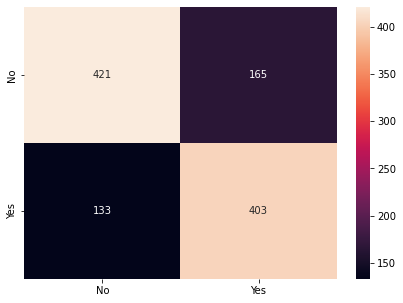

In [31]:
from sklearn.metrics import confusion_matrix

y_predict = bgcl.predict(x_test)

print(f' accuracy for training data = {bgcl.score(x_train , y_train)*100}')
print(f' accuracy for testing data = {bgcl.score(x_test , y_test)*100}')

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

- 133 churners got mis-classified as non-churners
- 165 non-churners got mis-classified as churners
- 421 non-churners and 403 churners got classified correctly

## Ensemble Learning - AdaBoosting

In [32]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)

abcl = abcl.fit(x_train, y_train)

 accuracy for training data = 76.29969418960245
 accuracy for testing data = 75.40106951871658


<AxesSubplot:>

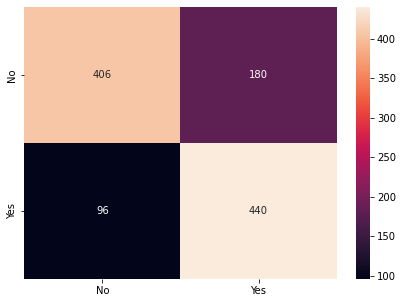

In [33]:
y_predict = abcl.predict(x_test)

print(f' accuracy for training data = {abcl.score(x_train , y_train)*100}')
print(f' accuracy for testing data = {abcl.score(x_test , y_test)*100}')

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

- 96 churners got mis-classified as non-churners
- 180 non-churners got mis-classified as churners
- 406 non-churners and 440 churners got classified correctly

##                     Ensemble Learning - GradientBoost

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

 accuracy for training data = 79.47247706422019
 accuracy for testing data = 76.20320855614973


<AxesSubplot:>

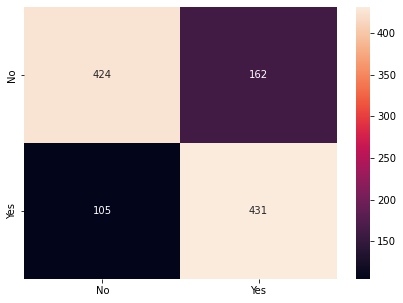

In [35]:
y_predict = gbcl.predict(x_test)

print(f' accuracy for training data = {gbcl.score(x_train , y_train)*100}')
print(f' accuracy for testing data = {gbcl.score(x_test , y_test)*100}')


cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

- 105 churners got mis-classified as non-churners
- 162 non-churners got mis-classified as churners
- 424 non-churners and 431 churners got classified correctly

## Ensemble RandomForest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1, max_features=12)
rfcl = rfcl.fit(x_train, y_train)

 accuracy for training data = 99.96177370030581
 accuracy for testing data = 74.15329768270945


<AxesSubplot:>

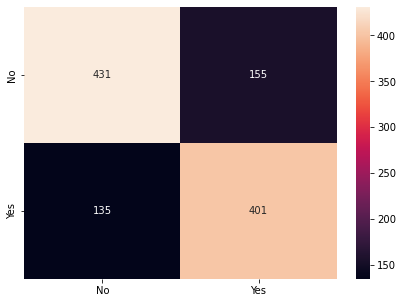

In [37]:
y_predict = rfcl.predict(x_test)

print(f' accuracy for training data = {rfcl.score(x_train , y_train)*100}')
print(f' accuracy for testing data = {rfcl.score(x_test , y_test)*100}')

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

- 135 churners got mis-classified as non-churners
- 155 non-churners got mis-classified as churners
- 431 non-churners and 401 churners got classified correctly

## Tuning the models

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# tuning bagging classifier

In [40]:
model = BaggingClassifier()
params = {'n_estimators':list(np.arange(60,80)),
          'max_features':list(np.arange(5,10)),
         }

clf0 = GridSearchCV(model, params)
clf0.fit(x_train,y_train)
bgclresults=pd.DataFrame(clf0.cv_results_)

In [41]:
# tuning adaboost classifier

In [42]:
model = AdaBoostClassifier()
params = {'n_estimators':list(np.arange(60,80)),
          'algorithm': ['SAMME', 'SAMME.R'],
         }

clf1 = GridSearchCV(model, params)
clf1.fit(x_train,y_train)
abclresults=pd.DataFrame(clf1.cv_results_)

In [43]:
# tuning gradient boosting classifier

In [44]:
model = GradientBoostingClassifier()
params = {'n_estimators':list(np.arange(60,80)),
          'loss':['deviance', 'exponential']
         }

clf2 = GridSearchCV(model, params)
clf2.fit(x_train,y_train)
gbclresults=pd.DataFrame(clf2.cv_results_)

In [45]:
# tuning random forest classifier

In [46]:
model = RandomForestClassifier()
params = {'n_estimators':list(np.arange(60,80)),
          'criterion' : [ 'gini', 'entropy'],
         }

clf3 = GridSearchCV(model, params)
clf3.fit(x_train,y_train)
rfclresults=pd.DataFrame(clf3.cv_results_)

In [47]:
# best accuracies after tuning the models with hyper parameters
print('bagging classifier:')
print('best parameters', bgclresults.loc[bgclresults['rank_test_score']==1]['params'].values[0])
print('best score', bgclresults.loc[bgclresults['rank_test_score']==1]['mean_test_score'].values[0])
print()

print('adaboost classifier:')
print('best parameters', abclresults.loc[abclresults['rank_test_score']==1]['params'].values[0])
print('best score', abclresults.loc[abclresults['rank_test_score']==1]['mean_test_score'].values[0])
print()

print('gradient boost classifier:')
print('best parameters', gbclresults.loc[gbclresults['rank_test_score']==1]['params'].values[0])
print('best score', gbclresults.loc[gbclresults['rank_test_score']==1]['mean_test_score'].values[0])
print()

print('random forest classifier:')
print('best parameters', rfclresults.loc[rfclresults['rank_test_score']==1]['params'].values[0])
print('best score', rfclresults.loc[rfclresults['rank_test_score']==1]['mean_test_score'].values[0])

bagging classifier:
best parameters {'max_features': 8, 'n_estimators': 72}
best score 0.7626158539255323

adaboost classifier:
best parameters {'algorithm': 'SAMME', 'n_estimators': 65}
best score 0.7649088494154394

gradient boost classifier:
best parameters {'loss': 'exponential', 'n_estimators': 72}
best score 0.7595580400799847

random forest classifier:
best parameters {'criterion': 'entropy', 'n_estimators': 69}
best score 0.7545852611913068


In [58]:
#Display and compare all the models designed with their train and test accuracies

model1 = BaggingClassifier(max_features= 8, n_estimators= 72)
model2 = AdaBoostClassifier(algorithm= 'SAMME', n_estimators= 65)
model3 = GradientBoostingClassifier(loss= 'exponential', n_estimators= 72)
model4 = RandomForestClassifier(criterion= 'entropy', n_estimators= 69)

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

print(f'model: Bagging Classifier\t\t Training accuracy: {100*round(model1.score(x_train,y_train),2)},\t Testing accuracy: {100*round(model1.score(x_test,y_test),2)}')
print(f'model: AdaBoost Classifier\t\t Training accuracy: {100*round(model2.score(x_train,y_train),2)},\t Testing accuracy: {100*round(model2.score(x_test,y_test),2)}')
print(f'model: Gradient Boost Classifier\t Training accuracy: {100*round(model3.score(x_train,y_train),2)},\t Testing accuracy: {100*round(model3.score(x_test,y_test),2)}')
print(f'model: Random Forest Classifier\t\t Training accuracy: {100*round(model4.score(x_train,y_train),2)},\t Testing accuracy: {100*round(model4.score(x_test,y_test),2)}')

model: Bagging Classifier		 Training accuracy: 99.0,	 Testing accuracy: 74.0
model: AdaBoost Classifier		 Training accuracy: 77.0,	 Testing accuracy: 77.0
model: Gradient Boost Classifier	 Training accuracy: 80.0,	 Testing accuracy: 75.0
model: Random Forest Classifier		 Training accuracy: 100.0,	 Testing accuracy: 74.0


The best model is AdaBoost Classifier because:
- It has the highest testing accuracy
- all other models seem to have higher discrepancies between training and testing accuracy which means they are overfitting
- Adaboost Classifier model doesnt appear to be underfit or overfit

In [59]:
# Save the Model to file in the current working directory
import pickle
pickle.dump(model2, open("best_model.pkl", 'wb'))

# Conclusion and improvisation:

• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the
telecom operator to perform a better data analysis in future.

In [49]:
#conclusion 

- The Best model for the given data is Adaboost classifier with parameters: algorithm= 'SAMME', n_estimators= 65
- We are able to correctly predict customers that will churn with 77% accuracy

**Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the telecom operator to perform a better data analysis in future.**
1. some columns had " " (a space) as a dummy filler which should be avoided to make detecting null cells easier 
2. columns such as monthly charges and total charges should mention if all numbers are in the same currency
3. more data could be included if customer recently bought/upgraded additional services
4. more data could be included if customer has previously left a bad feedback/complaint
5. more data could be collected about the age of the customer
6. data was imbalanced, more data could be included of churners